# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Display the number of mice.
len(mouse_study_df["Mouse ID"].value_counts())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Mouse ID with duplicate time points. 
duplicates_df = mouse_study_df.copy()
duplicate_status = duplicates_df[["Mouse ID", "Timepoint"]].duplicated()
duplicates_df["Duplicate?"] = duplicate_status
duplicates_df = duplicates_df.loc[duplicates_df["Duplicate?"]==True]
duplicates_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Clean DataFrame by removing the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Group data by Drug Regimen
summary_df = clean_mouse_study_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = summary_df["Tumor Volume (mm3)"].mean()
median_tumor = summary_df["Tumor Volume (mm3)"].median()
var_tumor = summary_df["Tumor Volume (mm3)"].var()
stdev_tumor = summary_df["Tumor Volume (mm3)"].std()
sem_tumor = summary_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
group_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor,
                          "Tumor Volme Variance": var_tumor, "Tumor Volume Std. Dev.": stdev_tumor,
                          "Tumor Volume Std. Err.": sem_tumor})
group_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volme Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

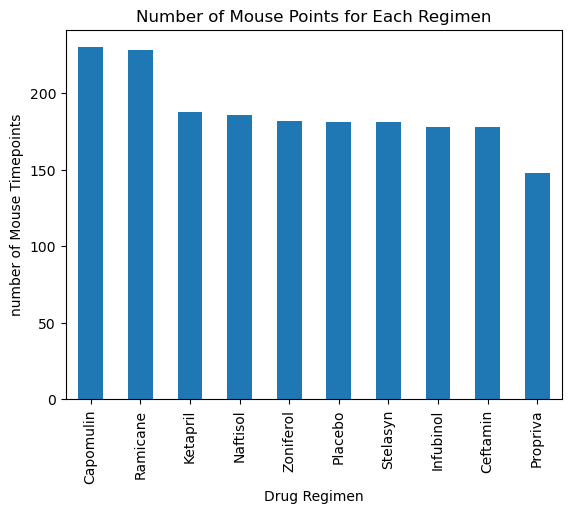

In [15]:
# Bar chart showing total number of rows (Mouse ID/Timepoints) for each drug regimen (Pandas).
timepoints_per_drug = clean_mouse_study_df["Drug Regimen"].value_counts()
timepoints_per_drug.plot(kind="bar", xlabel="Drug Regimen", ylabel="number of Mouse Timepoints", title="Number of Mouse Points for Each Regimen")
plt.show()

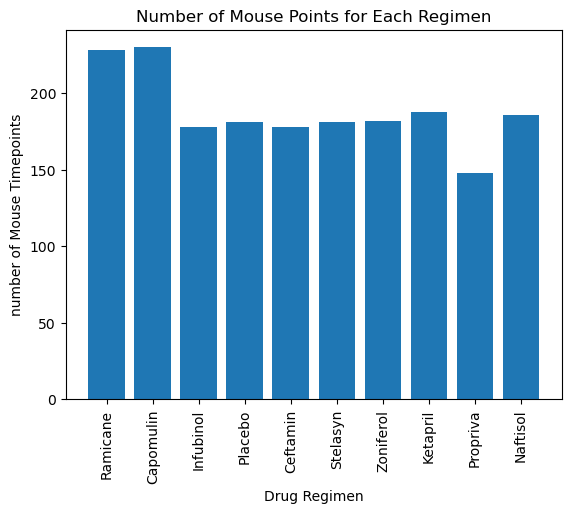

In [16]:
# Bar chart showing total number of rows (Mouse ID/Timepoints) for each drug regimen (pyplot).
drug_name = clean_mouse_study_df["Drug Regimen"].unique()
timepoints = [clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == drug].count()["Timepoint"] for drug in drug_name]
plt.bar(drug_name, timepoints)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation = 90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("number of Mouse Timepoints")

#set title
plt.title("Number of Mouse Points for Each Regimen")

plt.show()

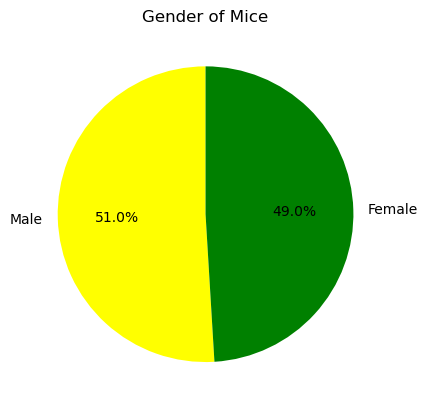

In [18]:
# distribution of female versus male mice in the study (Pandas)
gender = clean_mouse_study_df["Sex"].value_counts()
gender.plot(kind="pie", ylabel="", title="Gender of Mice",colors=["yellow", "green"],
                  startangle = 90, autopct="%1.1f%%")
plt.show()

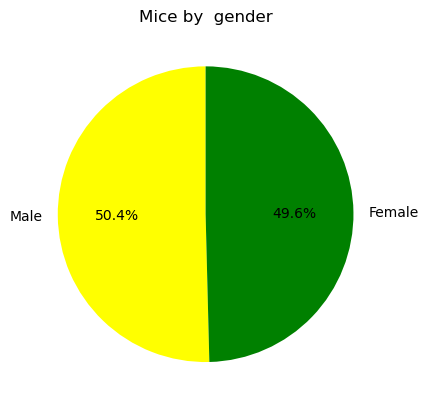

In [20]:
# distribution of female versus male mice in the study (pyplot)
unique_mice = clean_mouse_study_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
slice_colors = ["yellow", "green"]
plt.pie(unique_mice.values, labels = unique_mice.index, colors = slice_colors, startangle = 90, autopct="%1.1f%%")
plt.title("Mice by  gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin.

# timepoint for each mouse
mice_timepoint = pd.DataFrame(clean_mouse_study_df.groupby(['Mouse ID']).max()['Timepoint'])
mice_timepoint = mice_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_tumor = pd.merge(mice_timepoint, clean_mouse_study_df, on = ["Mouse ID", "Timepoint"])
mice_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# treatments into a list for for loop 
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data 
tumor_vol = {}

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    drug_tumor_vol = mice_tumor.loc[mice_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
 
  # Update dictionary 
    tumor_vol[drug] = drug_tumor_vol
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


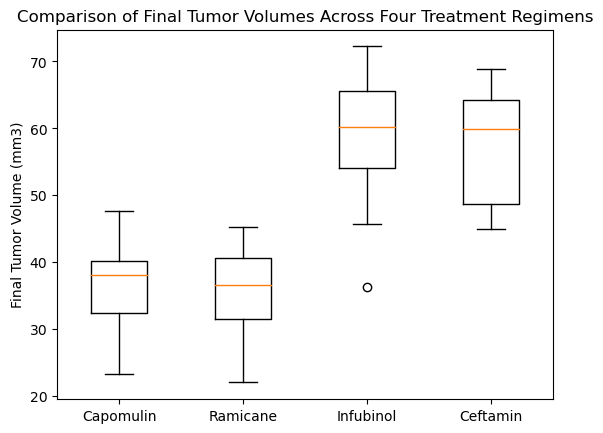

<function matplotlib.pyplot.show(close=None, block=None)>

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol.values(), labels=tumor_vol.keys())
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Comparison of Final Tumor Volumes Across Four Treatment Regimens")
plt.show()
plt.show

## Line and Scatter Plots

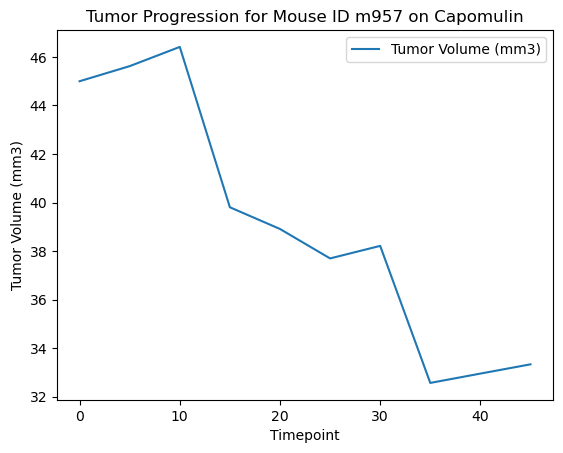

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]

#ataframe forMouse ID a644
mouse = "m957"
mouse_data = mice.loc[mice['Mouse ID'] == mouse]
mouse_data.plot(kind='line', x="Timepoint", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3)",
                title=f"Tumor Progression for Mouse ID {mouse} on Capomulin")
plt.show()

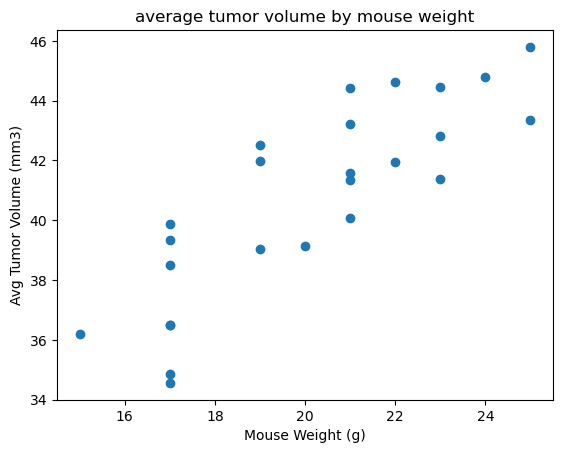

In [40]:
# # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

# title
plt.title("average tumor volume by mouse weight")

# Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen is 0.84.


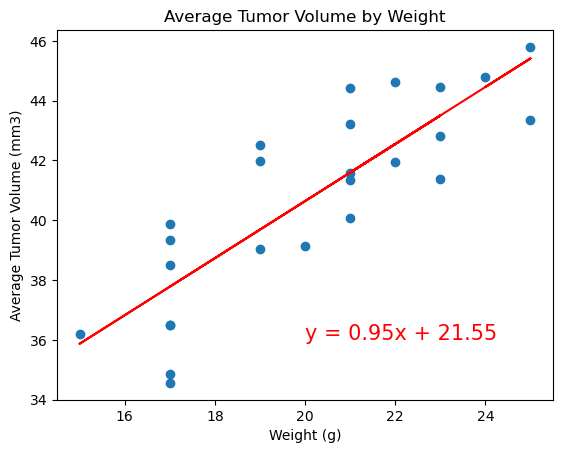

In [43]:
# Calculate the correlation coefficient and a linear regression model 
# between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Assuming you have already imported clean_mouse_study_df

capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x, y)

# Print the answer to the above calculation
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen is {round(correlation[0], 2)}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot linear regression on top of scatter plot
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")

# Annotate linear regression
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

